In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import punct_utils as utils

plt.style.use('default')
plt.rcParams["text.usetex"] = True
np.random.seed(14159)

# Set parameters

In [2]:
p = 800 # dimension
n = 2000 # sample size

eS = 1. # selection rate in the data matrix
eB = 0.1 # selection rate in the kernel matrix
b = 1 # diagonal values of B
nbMC = 10 # number of Monte-Carlo simulations

k = 2 # number of classes
pi = np.array([0.5, 0.5]) # proportion of each class
# centroid of each class
mu = stats.norm.rvs(size=(p, 1))
mu = 3*mu/np.linalg.norm(mu)
M = np.concatenate([+mu, -mu], axis=1)

# k = 2 # number of classes
# pi = np.array([0.5, 0.5]) # proportion of each class
# # centroid of each class
# M = stats.multivariate_normal.rvs(cov=np.kron(np.array([[10., 5.5], [5.5, 15.]]), np.eye(p))/p).reshape((p, k))

# k = 3 # number of classes
# pi = np.array([0.5, 0.3, 0.2]) # proportion of each class
# # centroid of each class
# M = stats.multivariate_normal.rvs(cov=np.kron(np.array([[10., 5.5, 2.],
#                                                         [5.5, 15., 4.],
#                                                         [2., 4., 12.]]), np.eye(p))/p).reshape((p, k))

In [3]:
c = p/n # size ratio

# size of each class
n_ = np.round(n*pi).astype(int)
n_[0] += n-np.sum(n_)

J = np.zeros((n, k), dtype=int)
sum_n = 0
for i, ni in enumerate(n_):
    J[sum_n:sum_n+ni, i] = 1
    sum_n += ni
np.random.shuffle(J)

setting = "$n = {} \quad c = {} \quad \\varepsilon_S = {} \quad \\varepsilon_B = {}$".format(n, c, eS, eB)

# Computations

**Limiting spectral distribution**: we use the fact that, if $m$ is the Stieltjes transform of a measure which has a density $d(x)$ in $x$, then
$$
d(x) = \frac{1}{\pi} \lim_{y \downarrow 0} \Im \left[ m(x + \mathrm{i} y) \right].
$$

In [4]:
# Simulations
eigvals, eigvecs, alignments = utils.simul_bernoulli(nbMC, p, n, k, M, J, eS, eB, b, comp=False)

# Phase transition (Bernoulli mask)
rho, zeta = utils.get_spikes_bernoulli(pi, M, c, eS, eB, b)

# Limiting spectral distribution (Bernoulli mask)
axr = np.linspace(eigvals.min(), eigvals.max(), 1000)
LSD = utils.get_LSD_bernoulli(axr, c, eS, eB, b)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 183.66it/s]


# Visualisation

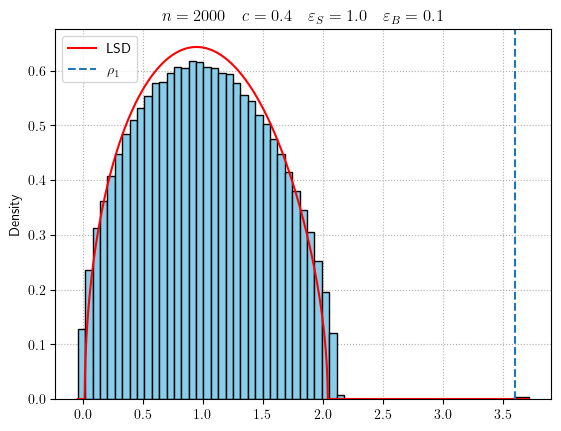

In [5]:
plt.hist(eigvals.flatten(), bins='auto', color='skyblue', edgecolor='black', density=True, zorder=2)
plt.plot(axr, LSD, color='red', label="LSD")
for i, r in enumerate(rho):
    plt.axvline(x=r, label="$\\rho_{}$".format(i+1), ls='--', color='C{}'.format(i))
plt.grid(ls=':')
plt.ylabel("Density")
plt.legend()
plt.title(setting)
plt.show()

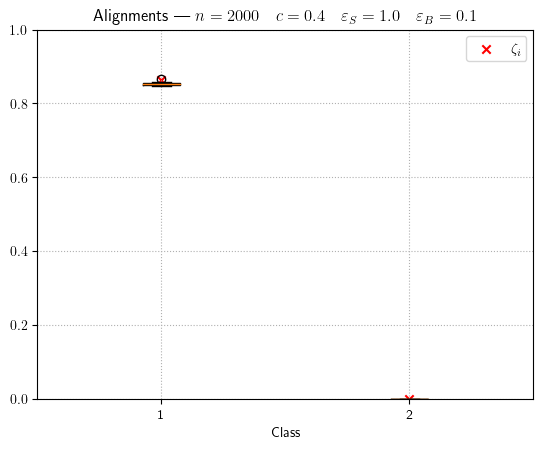

In [6]:
plt.boxplot(alignments)
plt.scatter(np.arange(1, k+1), zeta, marker='x', color='red', label="$\zeta_i$")
plt.grid(ls=':')
plt.ylim(0, 1)
plt.xlabel("Class")
plt.legend()
plt.title("Alignments | "+setting)
plt.show()

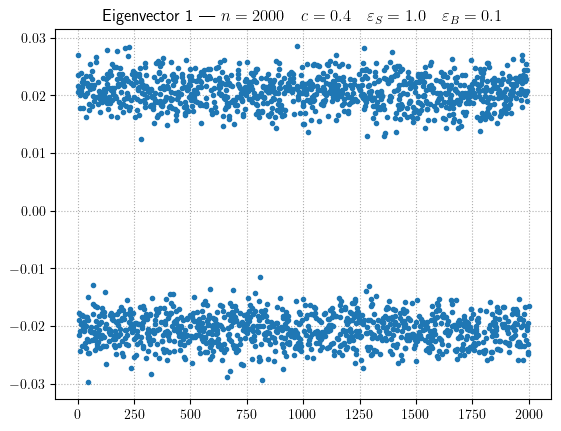

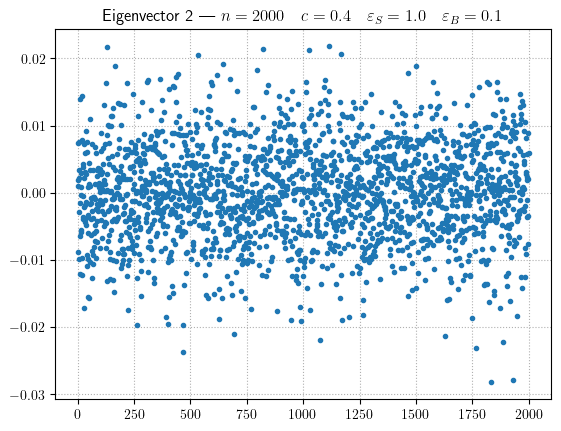

In [7]:
if k == 2:
    n1 = n_[0]
    for i in range(2):
        # Ensure that the first class has a greater mean component
        u_sgn_0 = np.sign(eigvecs[0, i, J[:, 0] == 1].mean()-eigvecs[0, i, J[:, 1] == 1].mean())
        u_sgn = np.sign(u_sgn_0*(eigvecs[:, i, :]@eigvecs[0, i, :]))
        u = eigvecs[:, i, :]*u_sgn.reshape((nbMC, 1))
        # Plot
        plt.plot(u.mean(axis=0), marker='.', ls='')
        plt.grid(ls=':')
        plt.title("Eigenvector {} | ".format(i+1)+setting)
        plt.show()